# **#Fake News Detection**

# Link for dataset:- https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###imorting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk

In [ ]:
##readind csv file
fake =  pd.read_csv('/content/drive/My Drive/Fake.csv')
true =  pd.read_csv('/content/drive/My Drive/True.csv')

In [ ]:
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
##find shape
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

In [ ]:
#find size
fake.size

93924

In [ ]:
true.size

85668

In [ ]:
##find null values
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
##find null values
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
# Check the data
data.head()

,title,text,subject,date,target
0,Britain is ready to walk away with no deal on ...,"MANCHESTER, England (Reuters) - Britain wants ...",worldnews,"October 3, 2017",true
1,Sanders disappointed after Trump pulls out of ...,WASHINGTON (Reuters) - U.S. Democratic preside...,politicsNews,"May 27, 2016",true
2,Venezuela says U.S. sanctions designed to push...,CARACAS (Reuters) - Venezuelan President Nicol...,politicsNews,"August 25, 2017",true
3,"Gingrich, Christie lead Trump list of vice pre...",WASHINGTON (Reuters) - Former House Speaker Ne...,politicsNews,"July 1, 2016",true
4,U.S. backs out of Latam development fund in si...,"ASUNCION (Reuters) - The United States, histor...",politicsNews,"April 3, 2017",true


In [ ]:
# Removing the data (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Britain is ready to walk away with no deal on ...,"MANCHESTER, England (Reuters) - Britain wants ...",worldnews,true
1,Sanders disappointed after Trump pulls out of ...,WASHINGTON (Reuters) - U.S. Democratic preside...,politicsNews,true
2,Venezuela says U.S. sanctions designed to push...,CARACAS (Reuters) - Venezuelan President Nicol...,politicsNews,true
3,"Gingrich, Christie lead Trump list of vice pre...",WASHINGTON (Reuters) - Former House Speaker Ne...,politicsNews,true
4,U.S. backs out of Latam development fund in si...,"ASUNCION (Reuters) - The United States, histor...",politicsNews,true


In [ ]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"MANCHESTER, England (Reuters) - Britain wants ...",worldnews,true
1,WASHINGTON (Reuters) - U.S. Democratic preside...,politicsNews,true
2,CARACAS (Reuters) - Venezuelan President Nicol...,politicsNews,true
3,WASHINGTON (Reuters) - Former House Speaker Ne...,politicsNews,true
4,"ASUNCION (Reuters) - The United States, histor...",politicsNews,true


In [ ]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"manchester, england (reuters) - britain wants ...",worldnews,true
1,washington (reuters) - u.s. democratic preside...,politicsNews,true
2,caracas (reuters) - venezuelan president nicol...,politicsNews,true
3,washington (reuters) - former house speaker ne...,politicsNews,true
4,"asuncion (reuters) - the united states, histor...",politicsNews,true


In [ ]:
# Remove punctuation
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
# Check
data.head()

,text,subject,target
0,manchester england reuters britain wants to n...,worldnews,true
1,washington reuters us democratic presidential...,politicsNews,true
2,caracas reuters venezuelan president nicolas ...,politicsNews,true
3,washington reuters former house speaker newt ...,politicsNews,true
4,asuncion reuters the united states historical...,politicsNews,true


In [ ]:
### stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
### Removing stopwords
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words )]))
data.head()

,text,subject,target
0,manchester england reuters britain wants negot...,worldnews,true
1,washington reuters us democratic presidential ...,politicsNews,true
2,caracas reuters venezuelan president nicolas m...,politicsNews,true
3,washington reuters former house speaker newt g...,politicsNews,true
4,asuncion reuters united states historically ma...,politicsNews,true


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


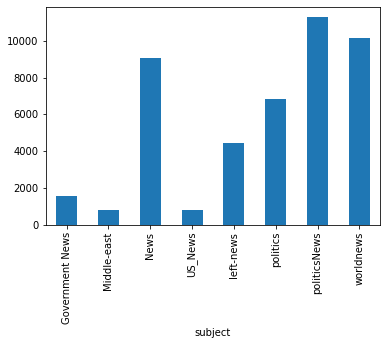

In [ ]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


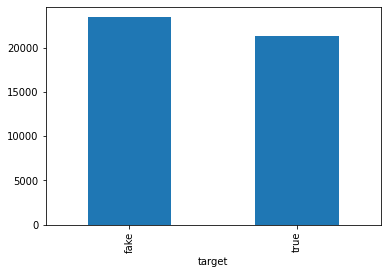

In [ ]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

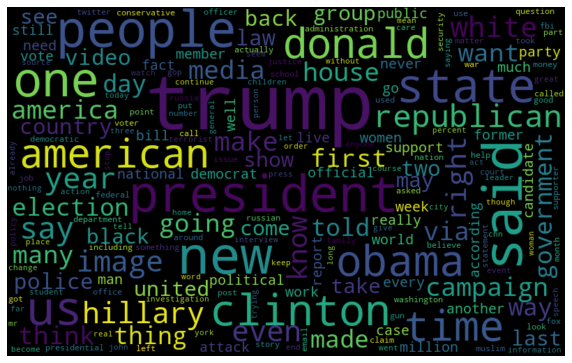

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

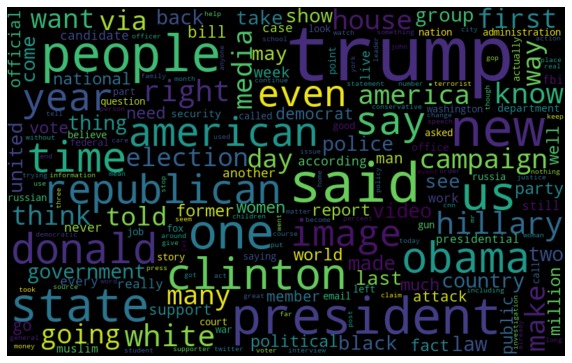

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter  
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

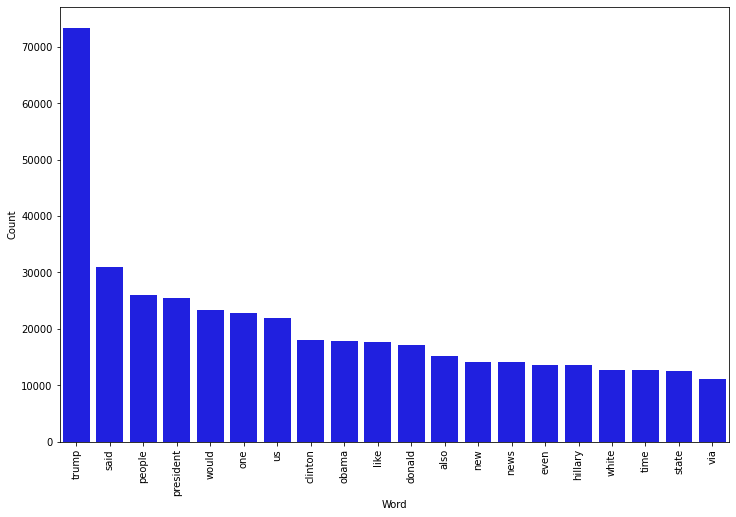

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

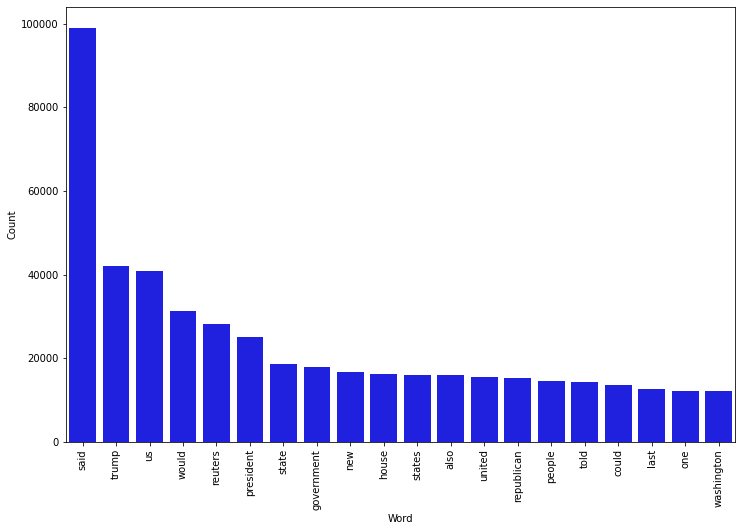

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

# Review-2





LabelEncoder(using for categorical data converting to numerical)

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data.target=l.fit_transform(data.target)
data.text=l.fit_transform(data.text)
data.subject=l.fit_transform(data.subject)

Splitting the data into training & testing

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('target',axis=1)
y=data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train,y_train)
log_pred=log.predict(X_test)

Accuracy Of Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
log_acc=f'{accuracy_score(y_test, log_pred)*100:.2f}%'
print('Accuracy of LogisticRegression:',log_acc)

Accuracy of LogisticRegression: 66.87%


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, log_pred))

[[2754 4211]
 [ 251 6254]]


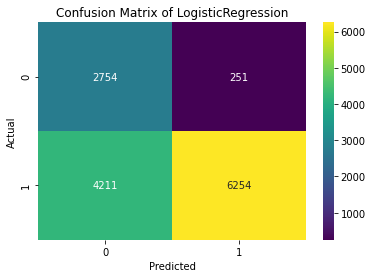

In [ ]:
ConfusionMatrix = confusion_matrix(log_pred,y_test)
sns.heatmap(ConfusionMatrix, annot = True, fmt = "d", cmap = 'viridis')
plt.title('Confusion Matrix of LogisticRegression')
plt.xlabel('Predicted')
plt.ylabel('Actual');

Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.92      0.40      0.55      6965
           1       0.60      0.96      0.74      6505

    accuracy                           0.67     13470
   macro avg       0.76      0.68      0.64     13470
weighted avg       0.76      0.67      0.64     13470



10 folds Cross-Validation

In [ ]:

from sklearn.model_selection import cross_val_score
scores_log = cross_val_score(log, X, y, cv=10)
scores_log

array([1.        , 0.6688196 , 1.        , 0.67104677, 1.        ,
       0.66414254, 1.        , 0.66659243, 0.66830029, 1.        ])

# Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)


Accuracy 

In [ ]:
from sklearn.metrics import accuracy_score
NB_acc=f'{accuracy_score(y_test, NB_pred)*100:.2f}%'
print('Accuracy of Navie Bayes:',NB_acc)

Accuracy of Navie Bayes: 100.00%


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, NB_pred))

[[6965    0]
 [   0 6505]]


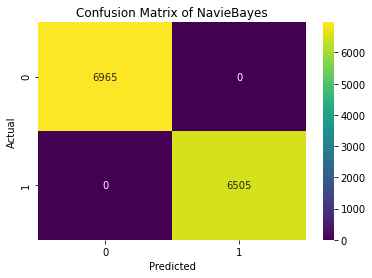

In [ ]:
ConfusionMatrix = confusion_matrix(NB_pred,y_test)
sns.heatmap(ConfusionMatrix, annot = True, fmt = "d", cmap = 'viridis')
plt.title('Confusion Matrix of NavieBayes')
plt.xlabel('Predicted')
plt.ylabel('Actual');

Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6965
           1       1.00      1.00      1.00      6505

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



10 folds Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores_NB = cross_val_score(NB, X, y, cv=10)
scores_NB

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
models = [
    {
        'label': 'Logistic Regression',
        'model': log
    },
    {
        'label': 'Naive Bayes',
        'model': NB
    }
    
]

#Roc curves of Logistic regression & Navie Bayes

<Figure size 432x288 with 0 Axes>

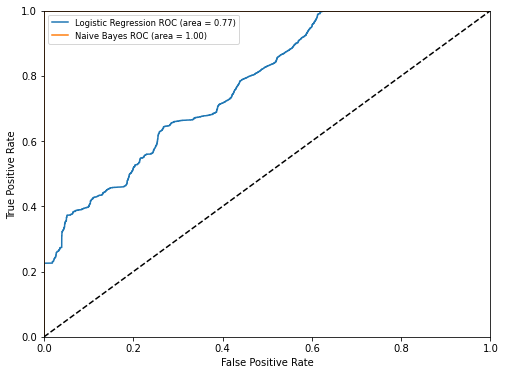

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
plt.clf()
plt.figure(figsize=(8,6))
for m in models:
    m['model'].probability = True
    probas = m['model'].fit(X_train,y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

# Hypothesis Testing

In my(fake news detection)dataset has no numerical columns. so i have taken the another dataset(educational income) for hypothesis testing

In [ ]:
df =  pd.read_csv('/content/drive/My Drive/educ_inc.csv')
df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
4,1/1/08 0:00,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
...,...,...,...,...,...,...
1021,1/1/14 0:00,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,1/1/14 0:00,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,1/1/14 0:00,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,1/1/14 0:00,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In this dataset..**Null Hypothesis**:- There is no difference in the population count between male & female.
                **Alternate Hypothesis**:- There is a difference in the population count between male & female.

In [ ]:
data={'Population Count':df['Population Count'],'Gender':df['Gender']}
edu=pd.DataFrame(data)
edu

,Population Count,Gender
0,1304,Male
1,1565,Female
2,1923,Male
3,1981,Female
4,2009,Female
...,...,...
1021,670294,Female
1022,682425,Male
1023,723208,Female
1024,953282,Female


In [ ]:
male = edu['Population Count'] [edu['Gender'] == 'Male']
male

0          1304
2          1923
5          2227
6          2606
7          3465
         ...   
1013     520580
1016     556174
1018     610313
1022     682425
1025    1628605
Name: Population Count, Length: 513, dtype: int64

In [ ]:
female = edu['Population Count'] [edu['Gender'] == 'Female']
female

1         1565
3         1981
4         2009
9         4233
10        4711
         ...  
1019    639596
1020    660048
1021    670294
1023    723208
1024    953282
Name: Population Count, Length: 513, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfa8bf0438>,
      dtype=object)

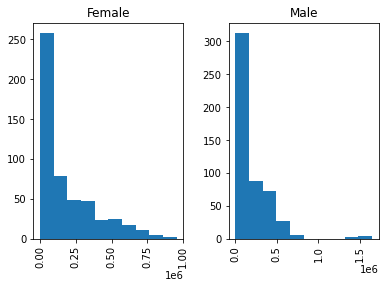

In [ ]:
edu.hist(by='Gender')

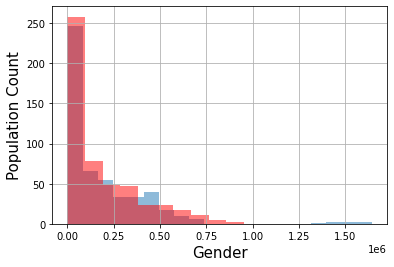

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline
male.hist(histtype='stepfilled', alpha=.5, bins=20) 
female.hist(histtype='stepfilled', alpha=.5, color='red', bins=10)
plot.xlabel('Gender',fontsize=15)
plot.ylabel('Population Count',fontsize=15)
plot.show()

In [ ]:
mean_table = edu.groupby('Gender').mean()
mean_table

,Population Count
Gender,
Female,183960.226121
Male,187125.479532


In [ ]:
observed_difference=mean_table['Population Count'][1]-mean_table['Population Count'][0]

In [ ]:
import numpy.random as npr
shuffled = edu.sample(1174, replace = True)
shuffled

,Population Count,Gender
231,116176,Female
1010,483518,Female
1010,483518,Female
196,52607,Male
719,456854,Female
...,...,...
8,3974,Male
701,296619,Male
909,27344,Male
549,266304,Female


In [ ]:
shuffled_counts = shuffled['Population Count']
type(shuffled_counts)

pandas.core.series.Series

In [ ]:
edu['shuffled_counts']=edu.mean(axis=1, skipna = True)
original_and_shuffled=edu
original_and_shuffled

,Population Count,Gender,shuffled_counts
0,1304,Male,1304.0
1,1565,Female,1565.0
2,1923,Male,1923.0
3,1981,Female,1981.0
4,2009,Female,2009.0
...,...,...,...
1021,670294,Female,670294.0
1022,682425,Male,682425.0
1023,723208,Female,723208.0
1024,953282,Female,953282.0


In [ ]:
all_group_means=original_and_shuffled.groupby('Gender').mean()
all_group_means

,Population Count,shuffled_counts
Gender,,
Female,183960.226121,183960.226121
Male,187125.479532,187125.479532


In [ ]:
difference=all_group_means['shuffled_counts'][1]-all_group_means['shuffled_counts'][0]
difference

3165.253411306039

In [ ]:
#One simulation
data={'Population Count':df['Population Count'],'Type':df['Gender']}
edu=pd.DataFrame(data)
shuffled = edu.sample(10840,replace = True)
shuffled_counts = shuffled['Population Count']
edu['shuffled_counts']=edu.mean(axis=1, skipna = True)
original_and_shuffled
all_group_means= original_and_shuffled.groupby('Gender').mean()
difference=all_group_means['shuffled_counts'][1]-all_group_means['shuffled_counts'][0]
difference

3165.253411306039

In [ ]:
##5000 Simulations
differences = np.zeros(5000)
for i in np.arange(5000):
    data={'Population Count':df['Population Count'],'Type':df['Gender']}
edu=pd.DataFrame(data)
shuffled = edu.sample(10840,replace = True)
shuffled_counts = shuffled['Population Count']
edu['shuffled_counts']=edu.mean(axis=1, skipna = True)
original_and_shuffled
all_group_means= original_and_shuffled.groupby('Gender').mean()
difference=all_group_means['shuffled_counts'][1]-all_group_means['shuffled_counts'][0] 
differences[i]=difference

In [ ]:
differences

array([   0.        ,    0.        ,    0.        , ...,    0.        ,
          0.        , 3165.25341131])

In [ ]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
4995,0.000000
4996,0.000000
4997,0.000000
4998,0.000000


In [ ]:
p_value=np.count_nonzero(differences <= observed_difference)/differences.size
p_value

1.0

In [ ]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# T - Test

In [ ]:
counts = edu['Population Count']
counts

0          1304
1          1565
2          1923
3          1981
4          2009
         ...   
1021     670294
1022     682425
1023     723208
1024     953282
1025    1628605
Name: Population Count, Length: 1026, dtype: int64

In [ ]:
len(counts)

1026

In [ ]:
counts_mean=np.mean(counts)
print(counts_mean)

185542.85282651073


In [ ]:
sample_size=10
counts_sample=np.random.choice(counts,sample_size)

In [ ]:
counts_sample

array([ 66646, 311597, 108052,   4295,   8609,   7600, 310527,  80402,
        10588, 238689])

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
ttest,p_value=ttest_1samp(counts_sample,50)

In [ ]:
print(p_value)

0.017922846139341562


In [ ]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis
